In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [2]:
df_raw = pd.read_csv("https://breathecode.herokuapp.com/asset/internal-link?id=809&path=housing.csv")
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [3]:
df_raw.sample(10, random_state=2025)

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
8651   4.8971      24.0  4.200704   1.024648      1152.0  2.028169     33.86   
3034   4.5903      13.0  6.759358   1.080214       552.0  2.951872     35.39   
2918   3.0435      40.0  5.009804   1.019608       771.0  2.519608     35.36   
12884  1.9805      16.0  3.977301   1.084489      1837.0  2.316520     38.66   
13325  2.3636      39.0  3.993399   1.023102      1294.0  4.270627     34.06   
2045   1.4007       7.0  4.466425   1.174229      1587.0  2.880218     36.73   
9331   2.7273      25.0  3.601545   1.049669      5917.0  3.265453     37.97   
16647  4.2411      27.0  6.436709   1.079114       768.0  2.430380     35.27   
8892   2.9934      35.0  3.349425   1.073563      1334.0  1.533333     34.02   
18177  8.6155      17.0  7.527273   1.010909       797.0  2.898182     37.36   

       Longitude  MedHouseVal  
8651     -118.39        4.007  
3034     -119.12        0.943  
2918     -119.04        0.695  
12884    -121.34        0.929  
13325    -117.63        0.883  
2045     -119.73        2.250  
9331     -122.50        1.875  
16647    -120.65        2.589  
8892     -118.50        3.500  
18177    -122.00        4.112

In [4]:
df_baking = df_raw.copy()
df_baking.columns = df_baking.columns.str.lower()
df = df_baking.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   medinc       20640 non-null  float64
 1   houseage     20640 non-null  float64
 2   averooms     20640 non-null  float64
 3   avebedrms    20640 non-null  float64
 4   population   20640 non-null  float64
 5   aveoccup     20640 non-null  float64
 6   latitude     20640 non-null  float64
 7   longitude    20640 non-null  float64
 8   medhouseval  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [5]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=2025)
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_train.shape, df_test.shape

((16512, 9), (4128, 9))

In [6]:
scaler = MinMaxScaler()
X_train_sc = scaler.fit_transform(df_train)
X_train_sc = pd.DataFrame(X_train_sc, columns= df_train.columns)
X_test_sc = scaler.transform(df_test)
X_test_sc = pd.DataFrame(X_test_sc, columns= df_test.columns)


In [7]:
display(df.describe().T)

count         mean          std         min         25%  \
medinc       20640.0     3.870671     1.899822    0.499900    2.563400   
houseage     20640.0    28.639486    12.585558    1.000000   18.000000   
averooms     20640.0     5.429000     2.474173    0.846154    4.440716   
avebedrms    20640.0     1.096675     0.473911    0.333333    1.006079   
population   20640.0  1425.476744  1132.462122    3.000000  787.000000   
aveoccup     20640.0     3.070655    10.386050    0.692308    2.429741   
latitude     20640.0    35.631861     2.135952   32.540000   33.930000   
longitude    20640.0  -119.569704     2.003532 -124.350000 -121.800000   
medhouseval  20640.0     2.068558     1.153956    0.149990    1.196000   

                     50%          75%           max  
medinc          3.534800     4.743250     15.000100  
houseage       29.000000    37.000000     52.000000  
averooms        5.229129     6.052381    141.909091  
avebedrms       1.048780     1.099526     34.066667  
population   1166.000000  1725.000000  35682.000000  
aveoccup        2.818116     3.282261   1243.333333  
latitude       34.260000    37.710000     41.950000  
longitude    -118.490000  -118.010000   -114.310000  
medhouseval     1.797000     2.647250      5.000010

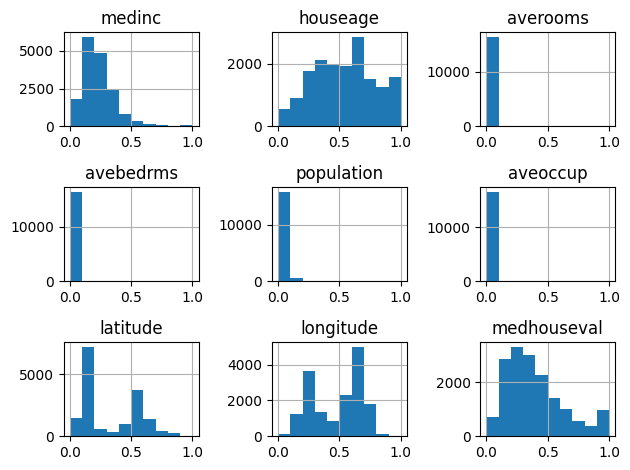

In [8]:
X_train_sc.hist()
plt.tight_layout()
plt.show()

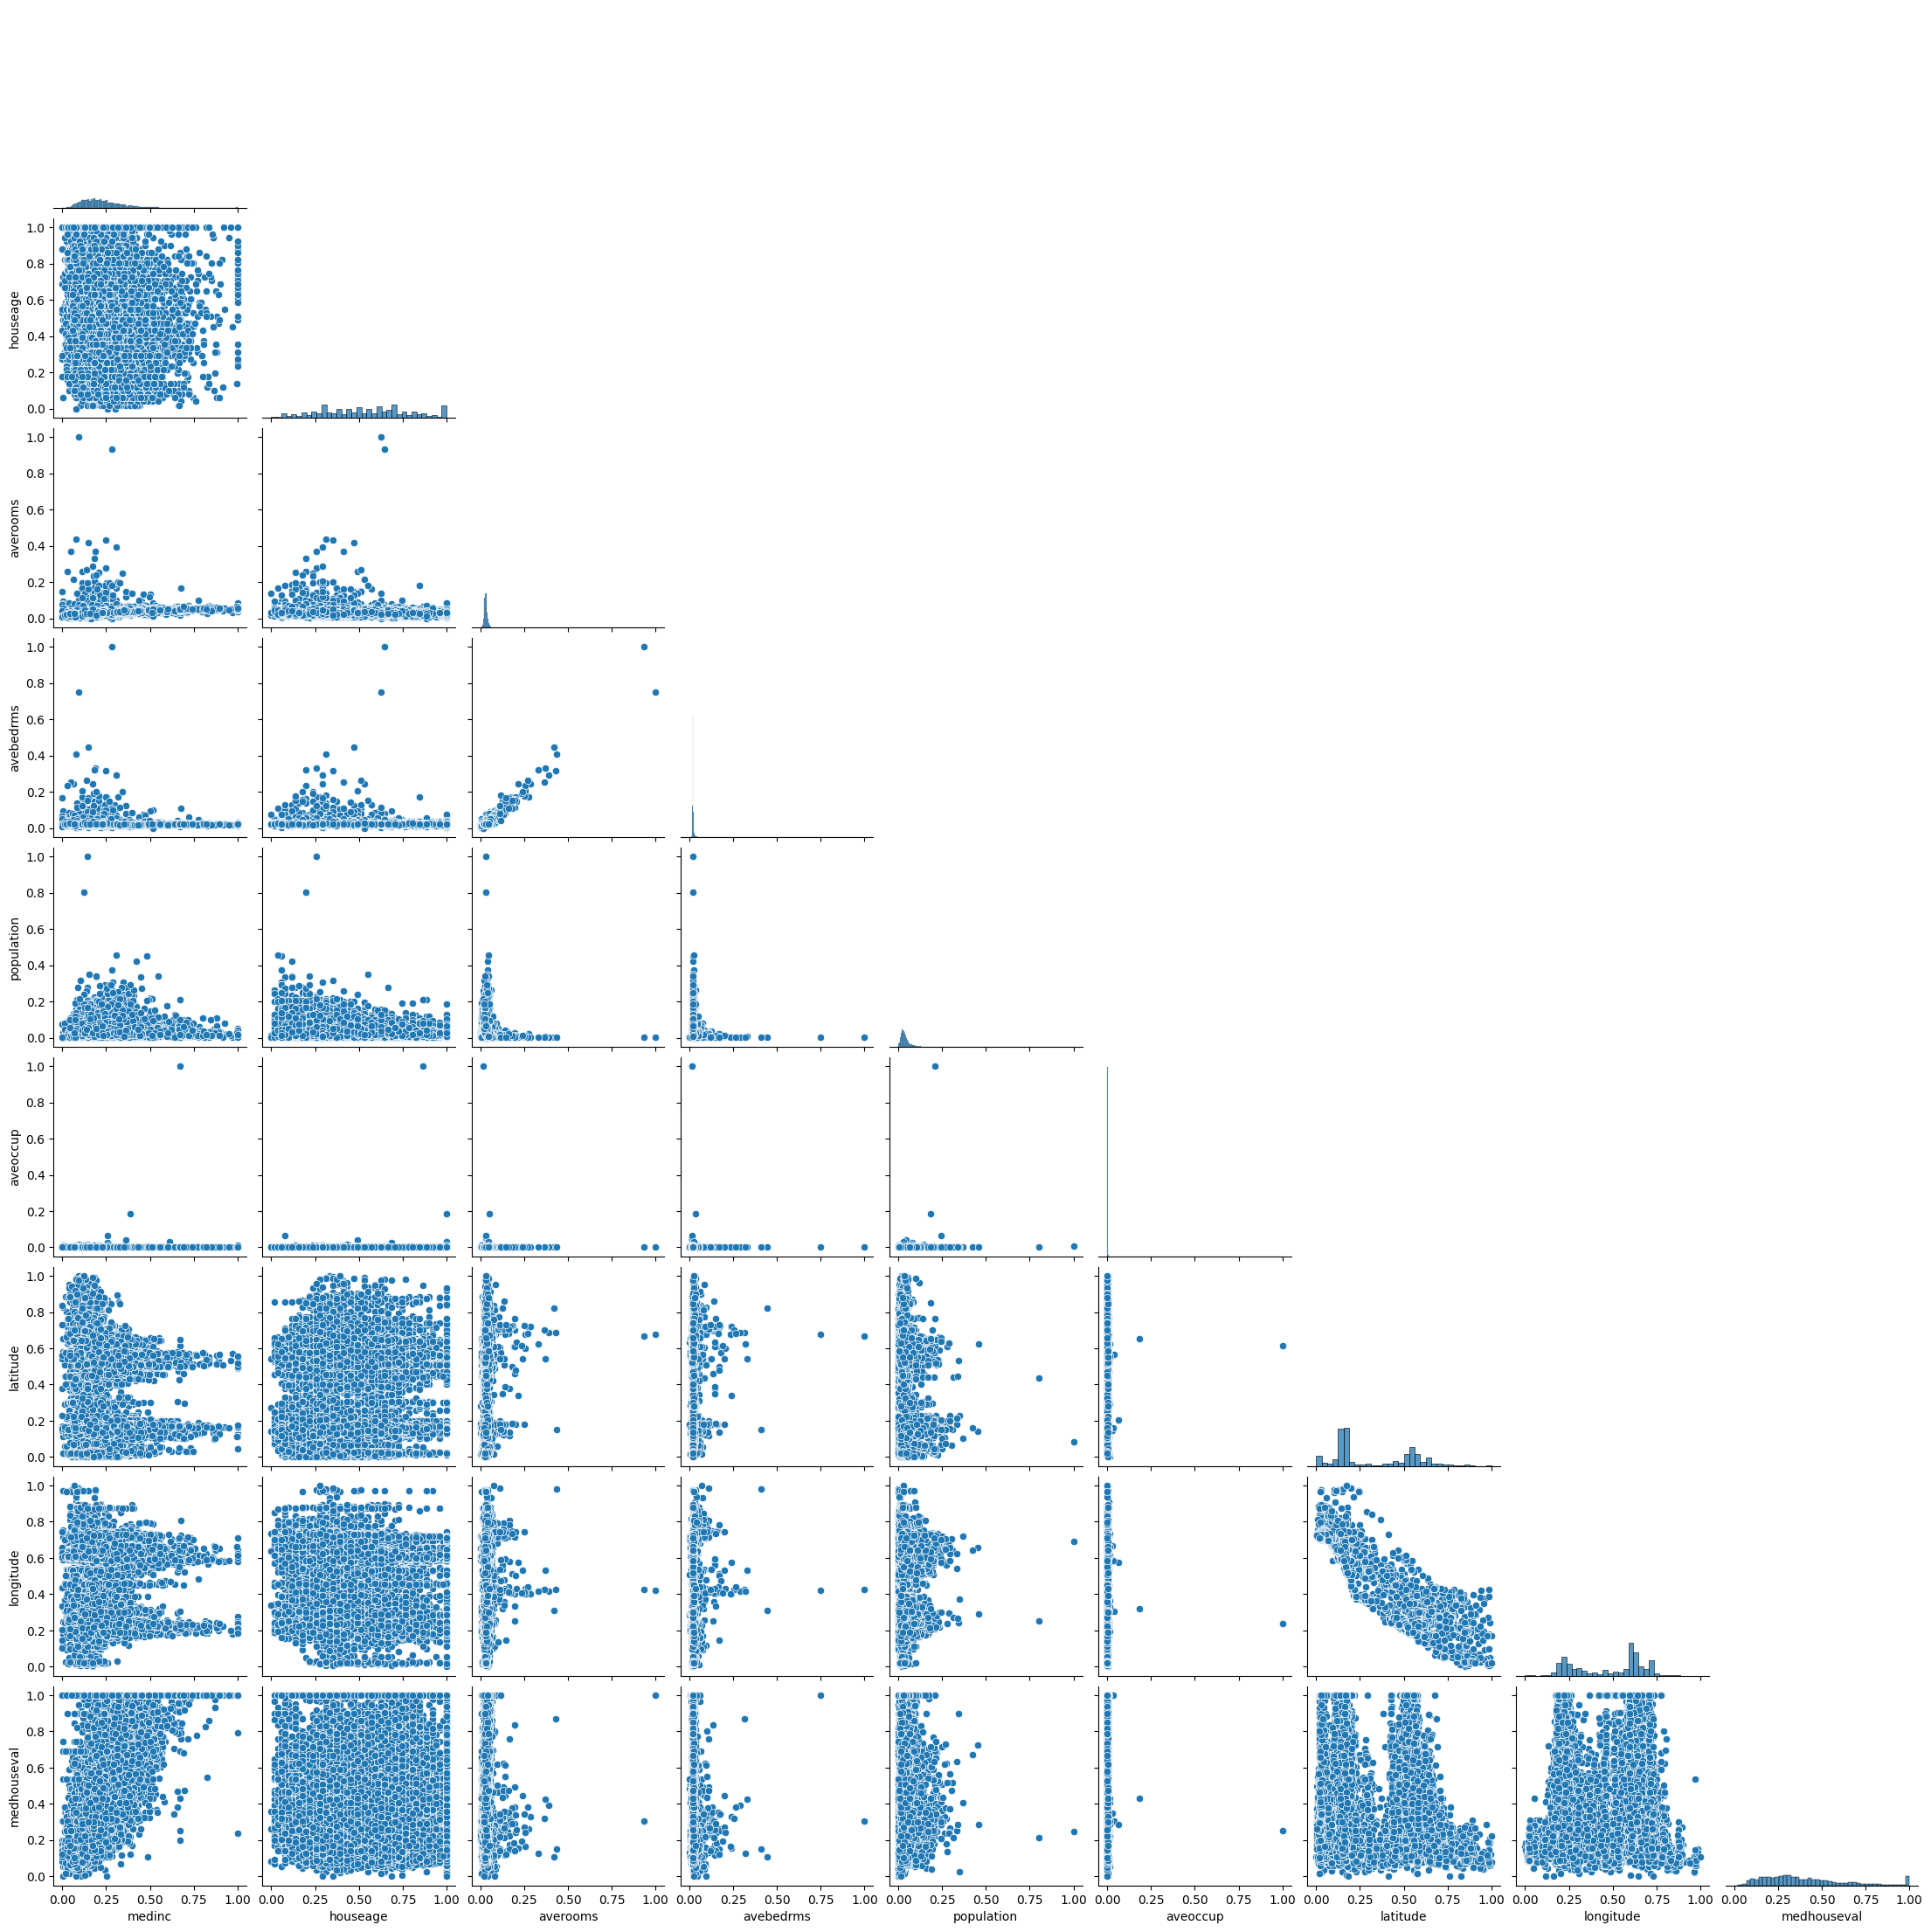

In [9]:
sns.pairplot(X_train_sc, corner=True)
plt.show()

en la mayoria de graficas se ve 2 grupos, uno muy cercano y uno disperso

In [10]:
clu_kmeans = KMeans(n_clusters=2)
clu_kmeans.fit(X_train_sc)

KMeans(n_clusters=2)

In [11]:
labels = clu_kmeans.labels_
df_clustered = df_train
df_clustered["cluster"]=labels

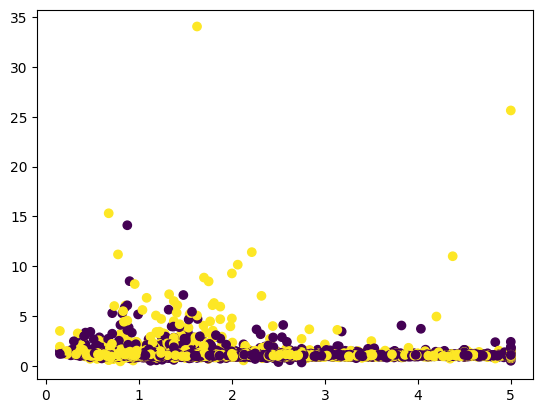

In [12]:
plt.scatter(df_clustered["medhouseval"], df_clustered["avebedrms"], c= df_clustered["cluster"])
plt.show()

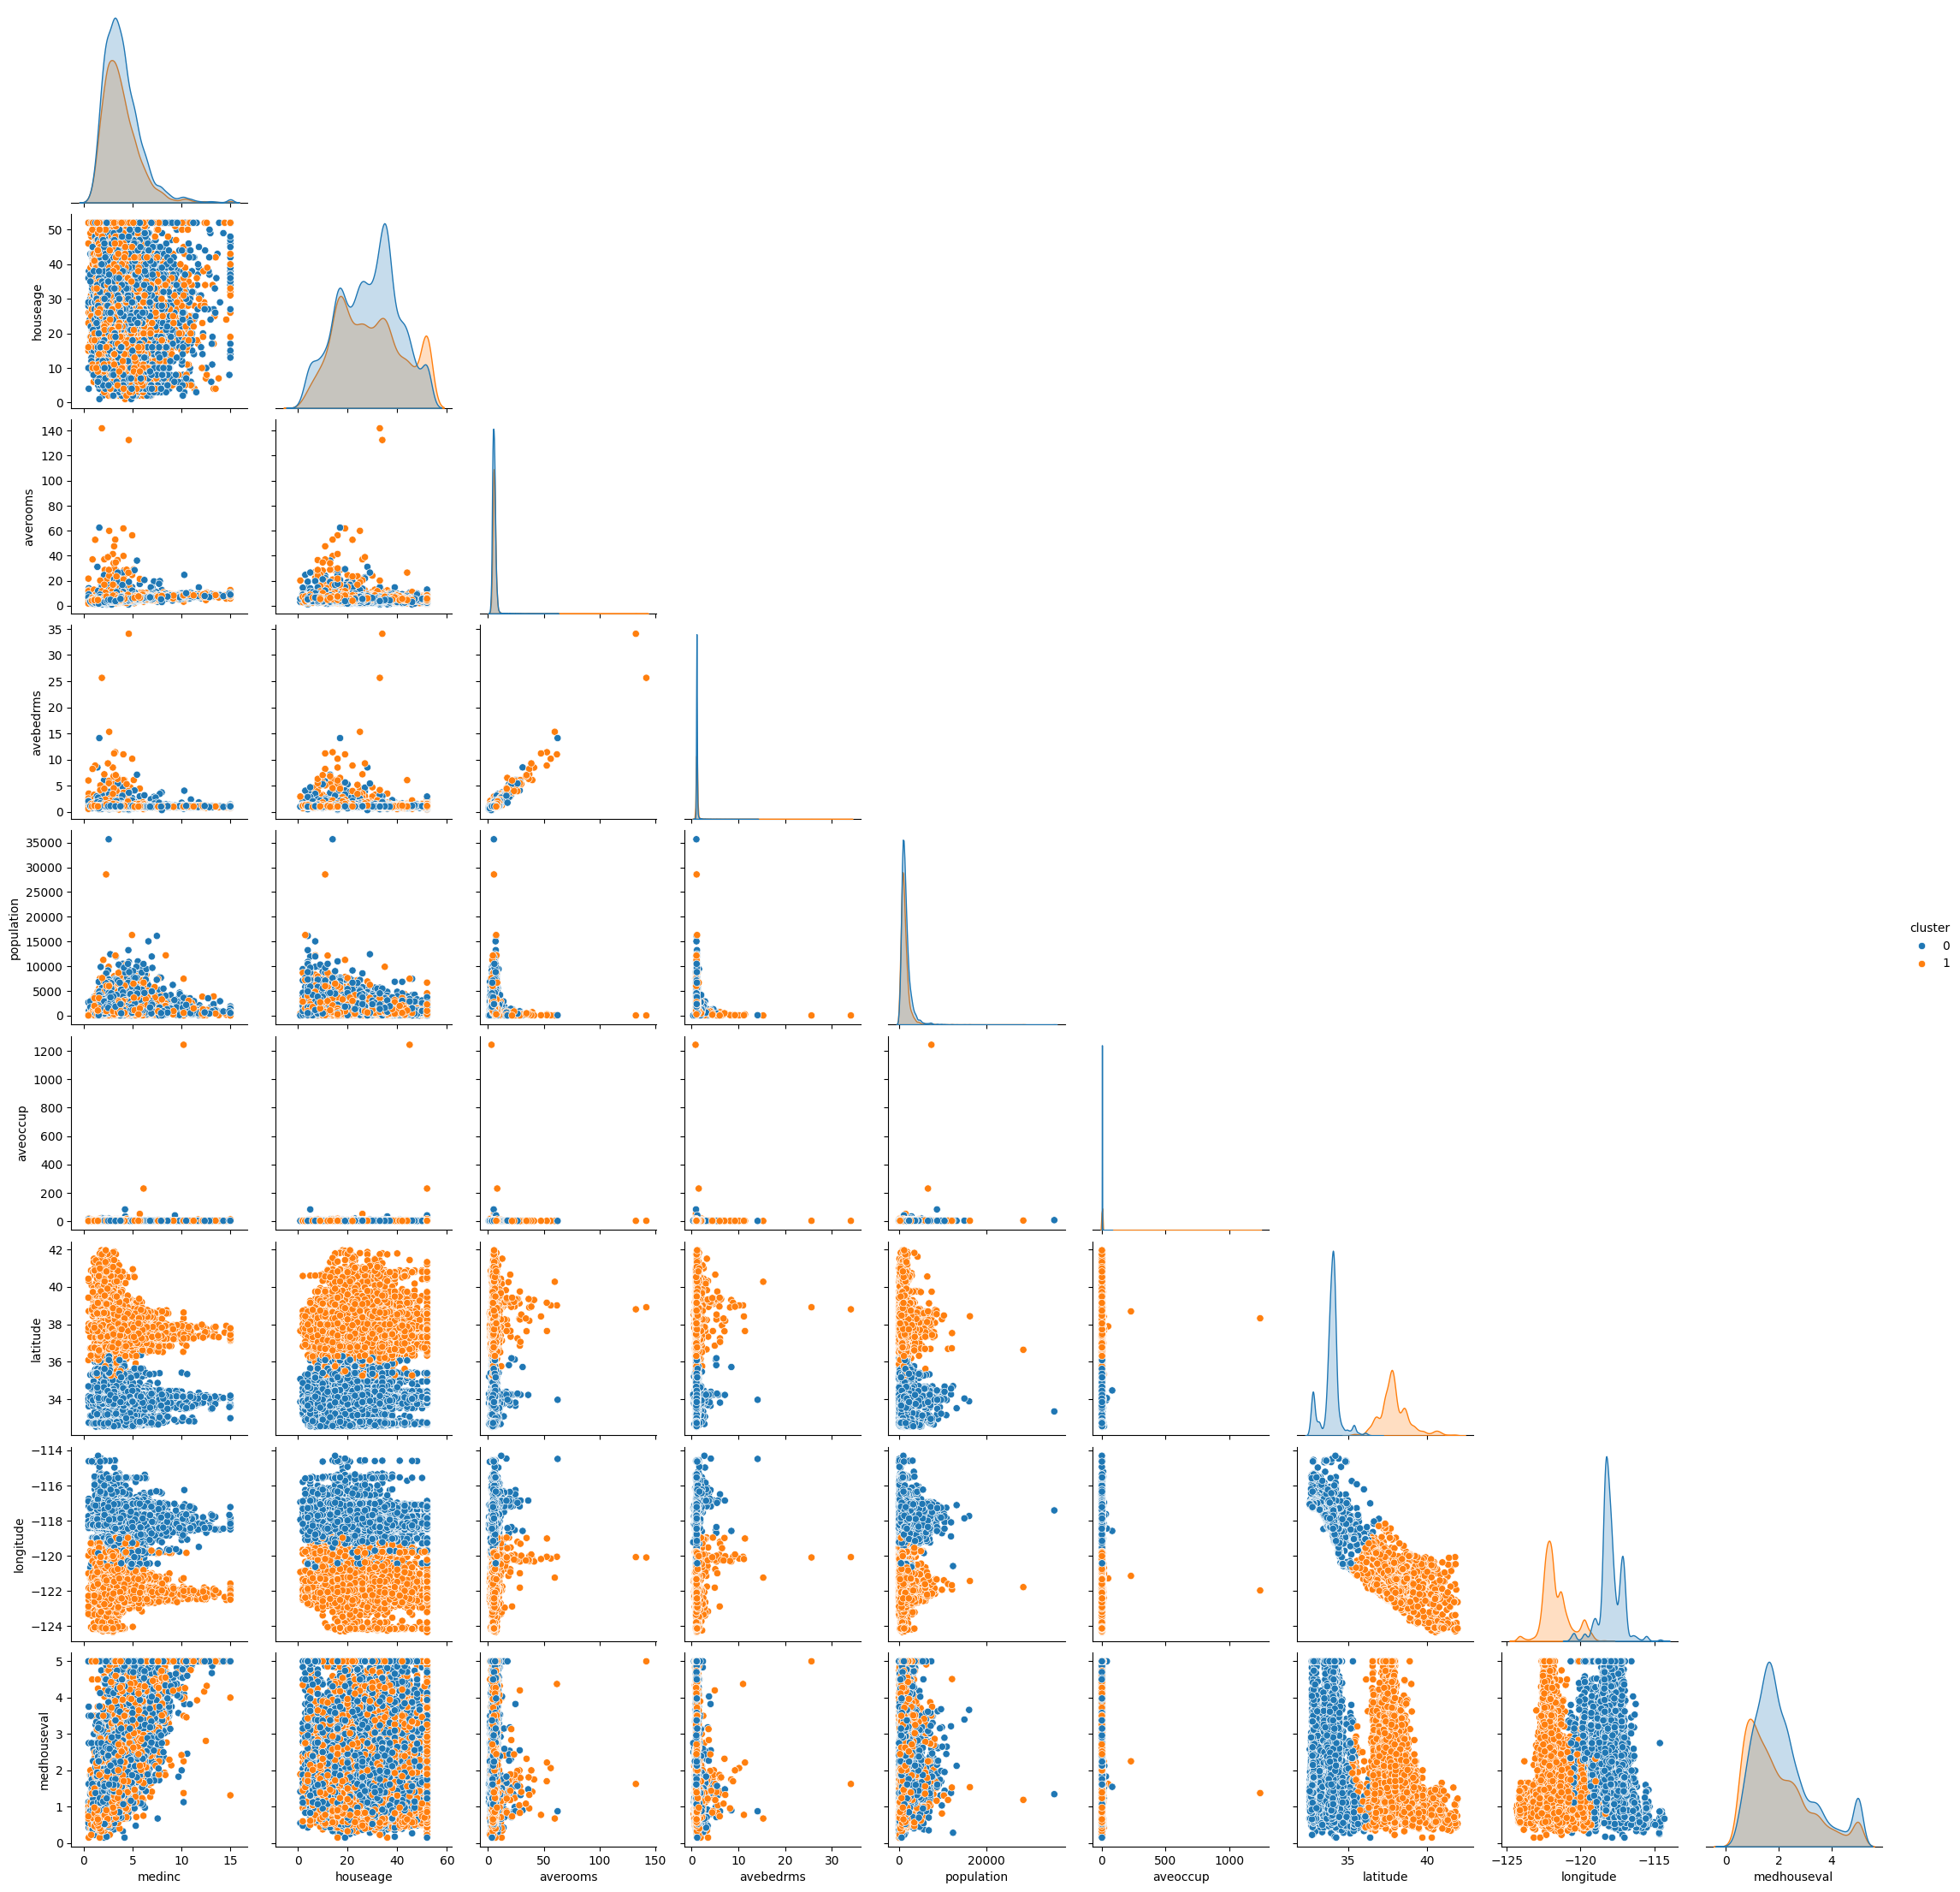

In [13]:
sns.pairplot(df_clustered, hue="cluster", corner=True)
plt.show()

claramente hizo las divisiones por latitud y longitud, considero eliminar estas variables

In [14]:
df_train = df_train.drop(columns=["latitude","longitude"])
df_test = df_test.drop(columns=["latitude","longitude"])
X_train_sc = X_train_sc.drop(columns=["latitude","longitude"])
X_test_sc = X_test_sc.drop(columns=["latitude","longitude"])

In [15]:
clu_kmeans = KMeans(n_clusters=2)
clu_kmeans.fit(X_train_sc)

KMeans(n_clusters=2)

In [16]:
labels = clu_kmeans.labels_
df_clustered = df_train
df_clustered["cluster"]=labels

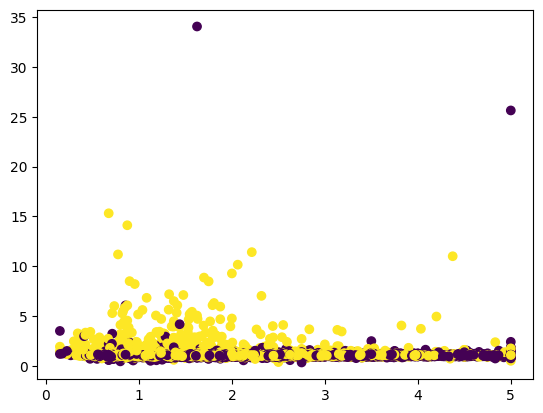

In [17]:
plt.scatter(df_clustered["medhouseval"], df_clustered["avebedrms"], c= df_clustered["cluster"])
plt.show()

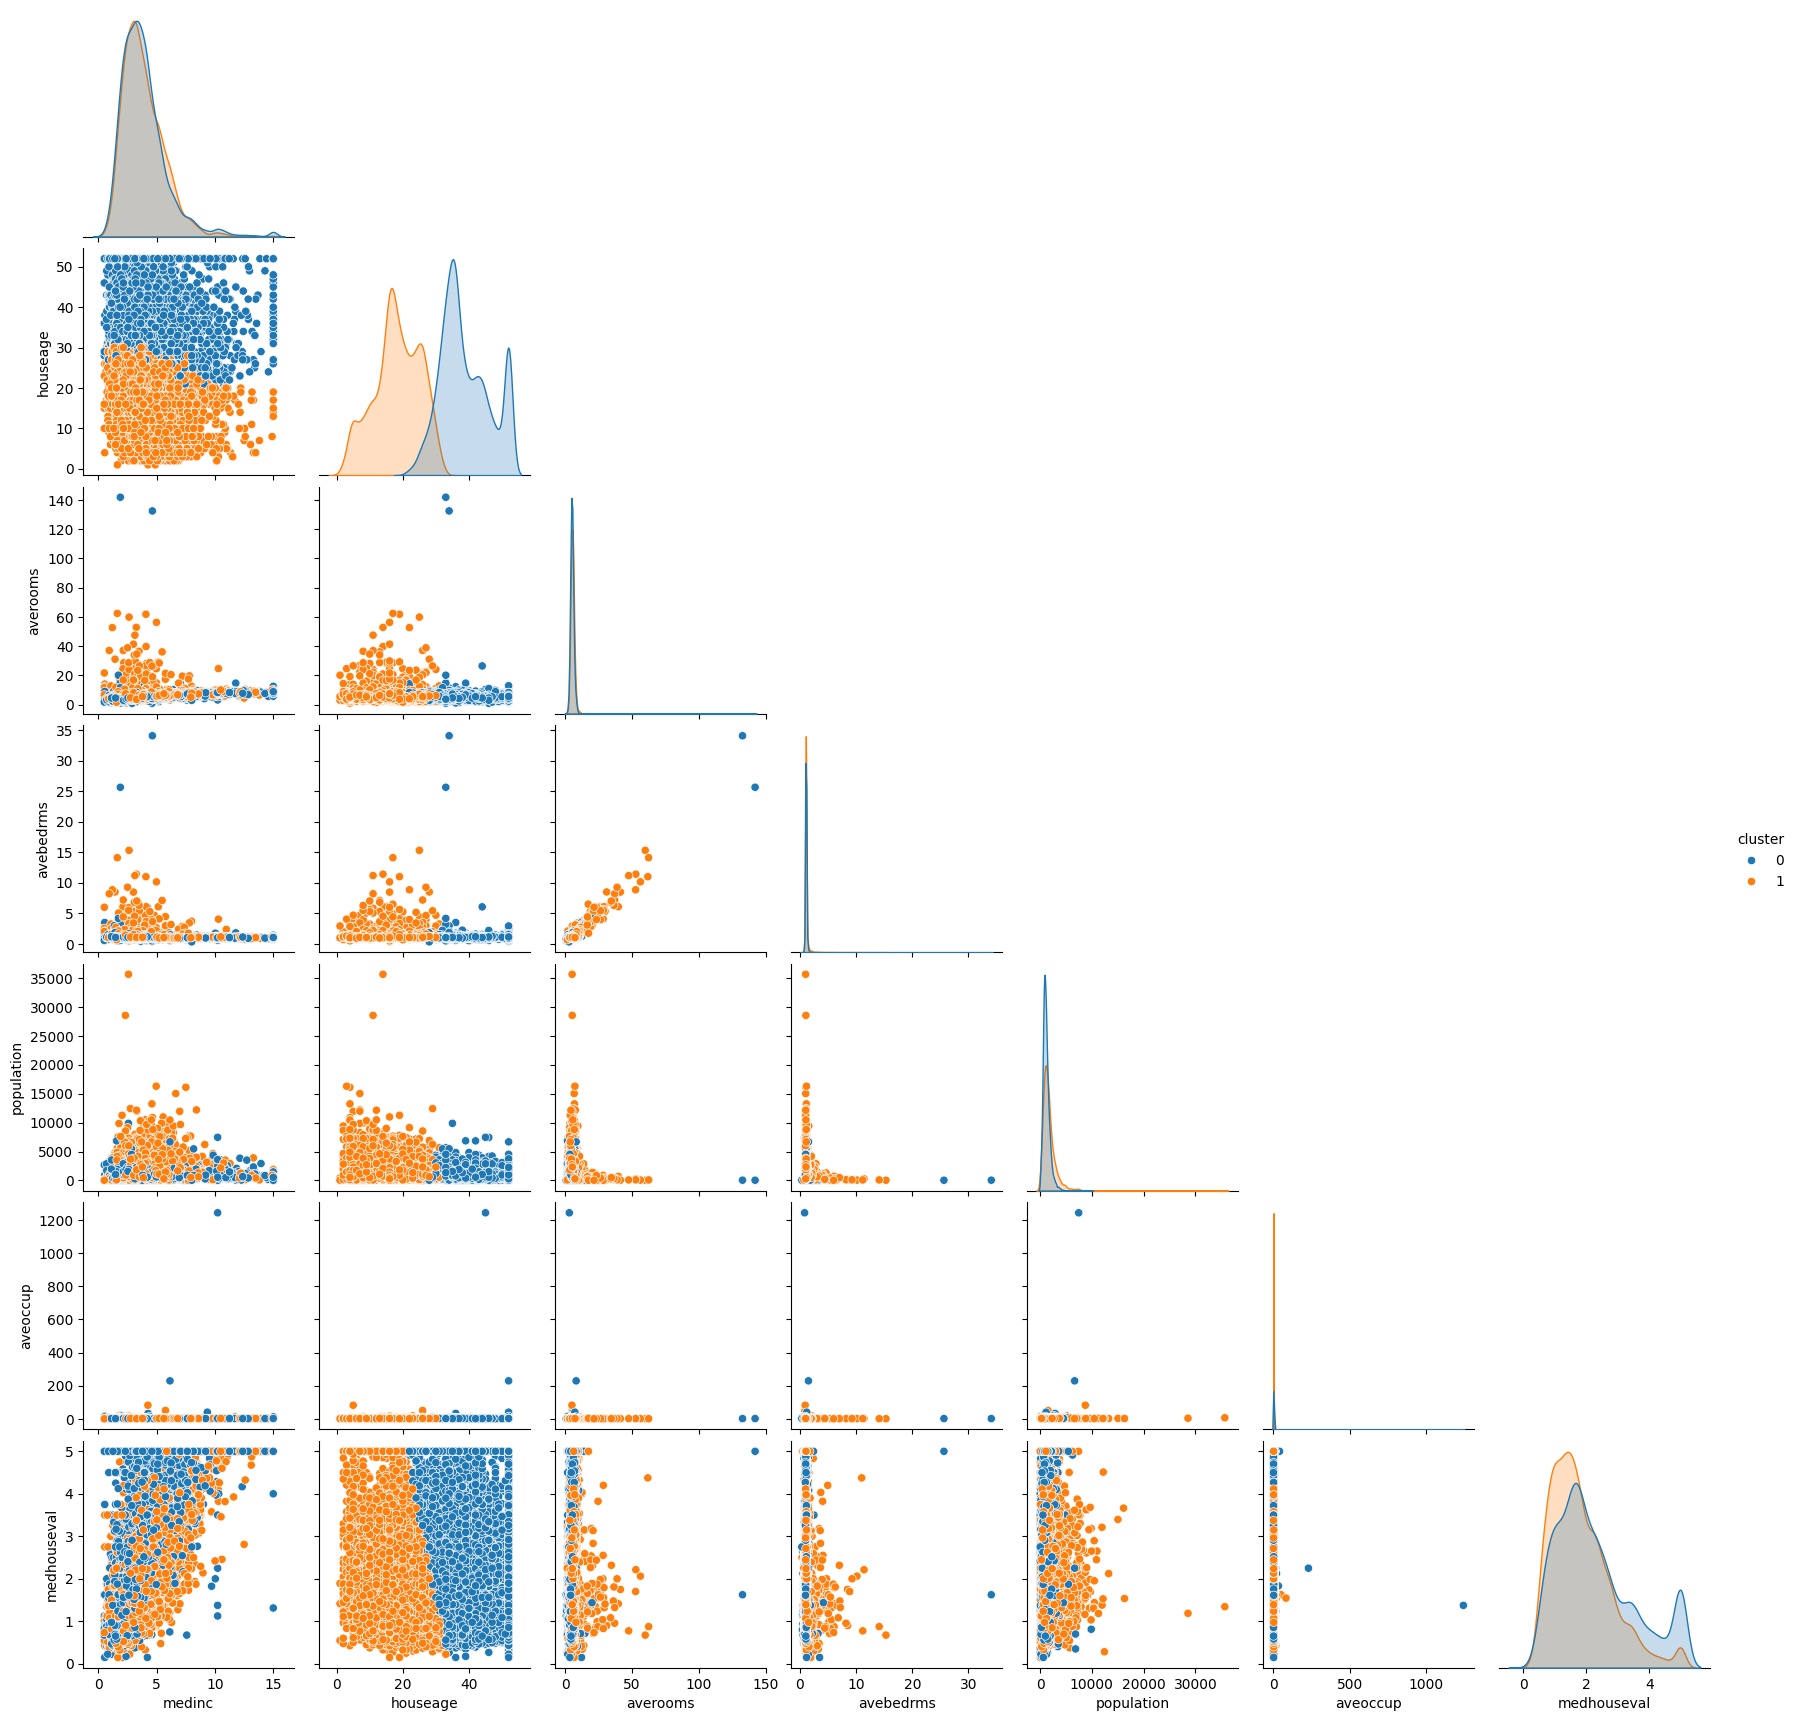

In [18]:
sns.pairplot(df_clustered, hue="cluster", corner=True)
plt.show()

Se ven mejores agrupamientos eliminando la latitud y longitud

In [19]:
#Método del codo
inertia = []
K= range(1,10)
for k in K:
  kmeans= KMeans(n_clusters= k)
  kmeans.fit(X_train_sc)
  inertia.append(kmeans.inertia_)

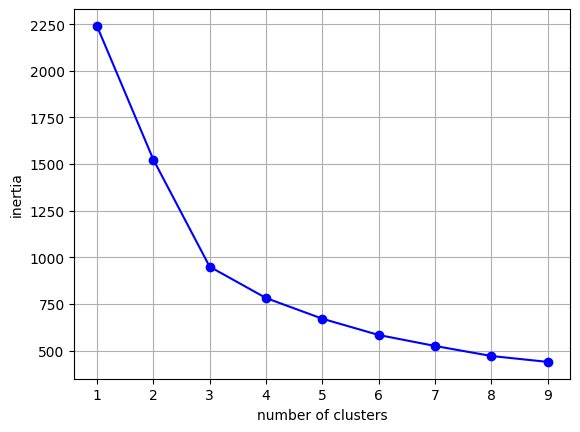

In [20]:
plt.plot(K, inertia, "bo-")
plt.xlabel("number of clusters")
plt.ylabel("inertia")
plt.grid(True)
plt.show()

El metodo del codo indica que 3 es el mejor k

In [21]:
clu_kmeans = KMeans(n_clusters=3)
clu_kmeans.fit(X_train_sc)

KMeans(n_clusters=3)

In [22]:
labels = clu_kmeans.labels_
df_clustered = df_train
df_clustered["cluster"]=labels

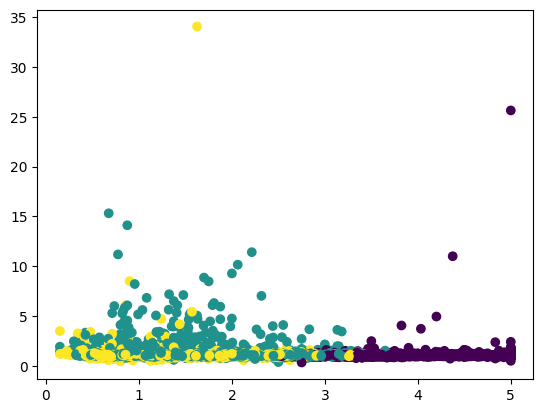

In [23]:
plt.scatter(df_clustered["medhouseval"], df_clustered["avebedrms"], c= df_clustered["cluster"])
plt.show()

en esta graafica hay 2 grupos difusos

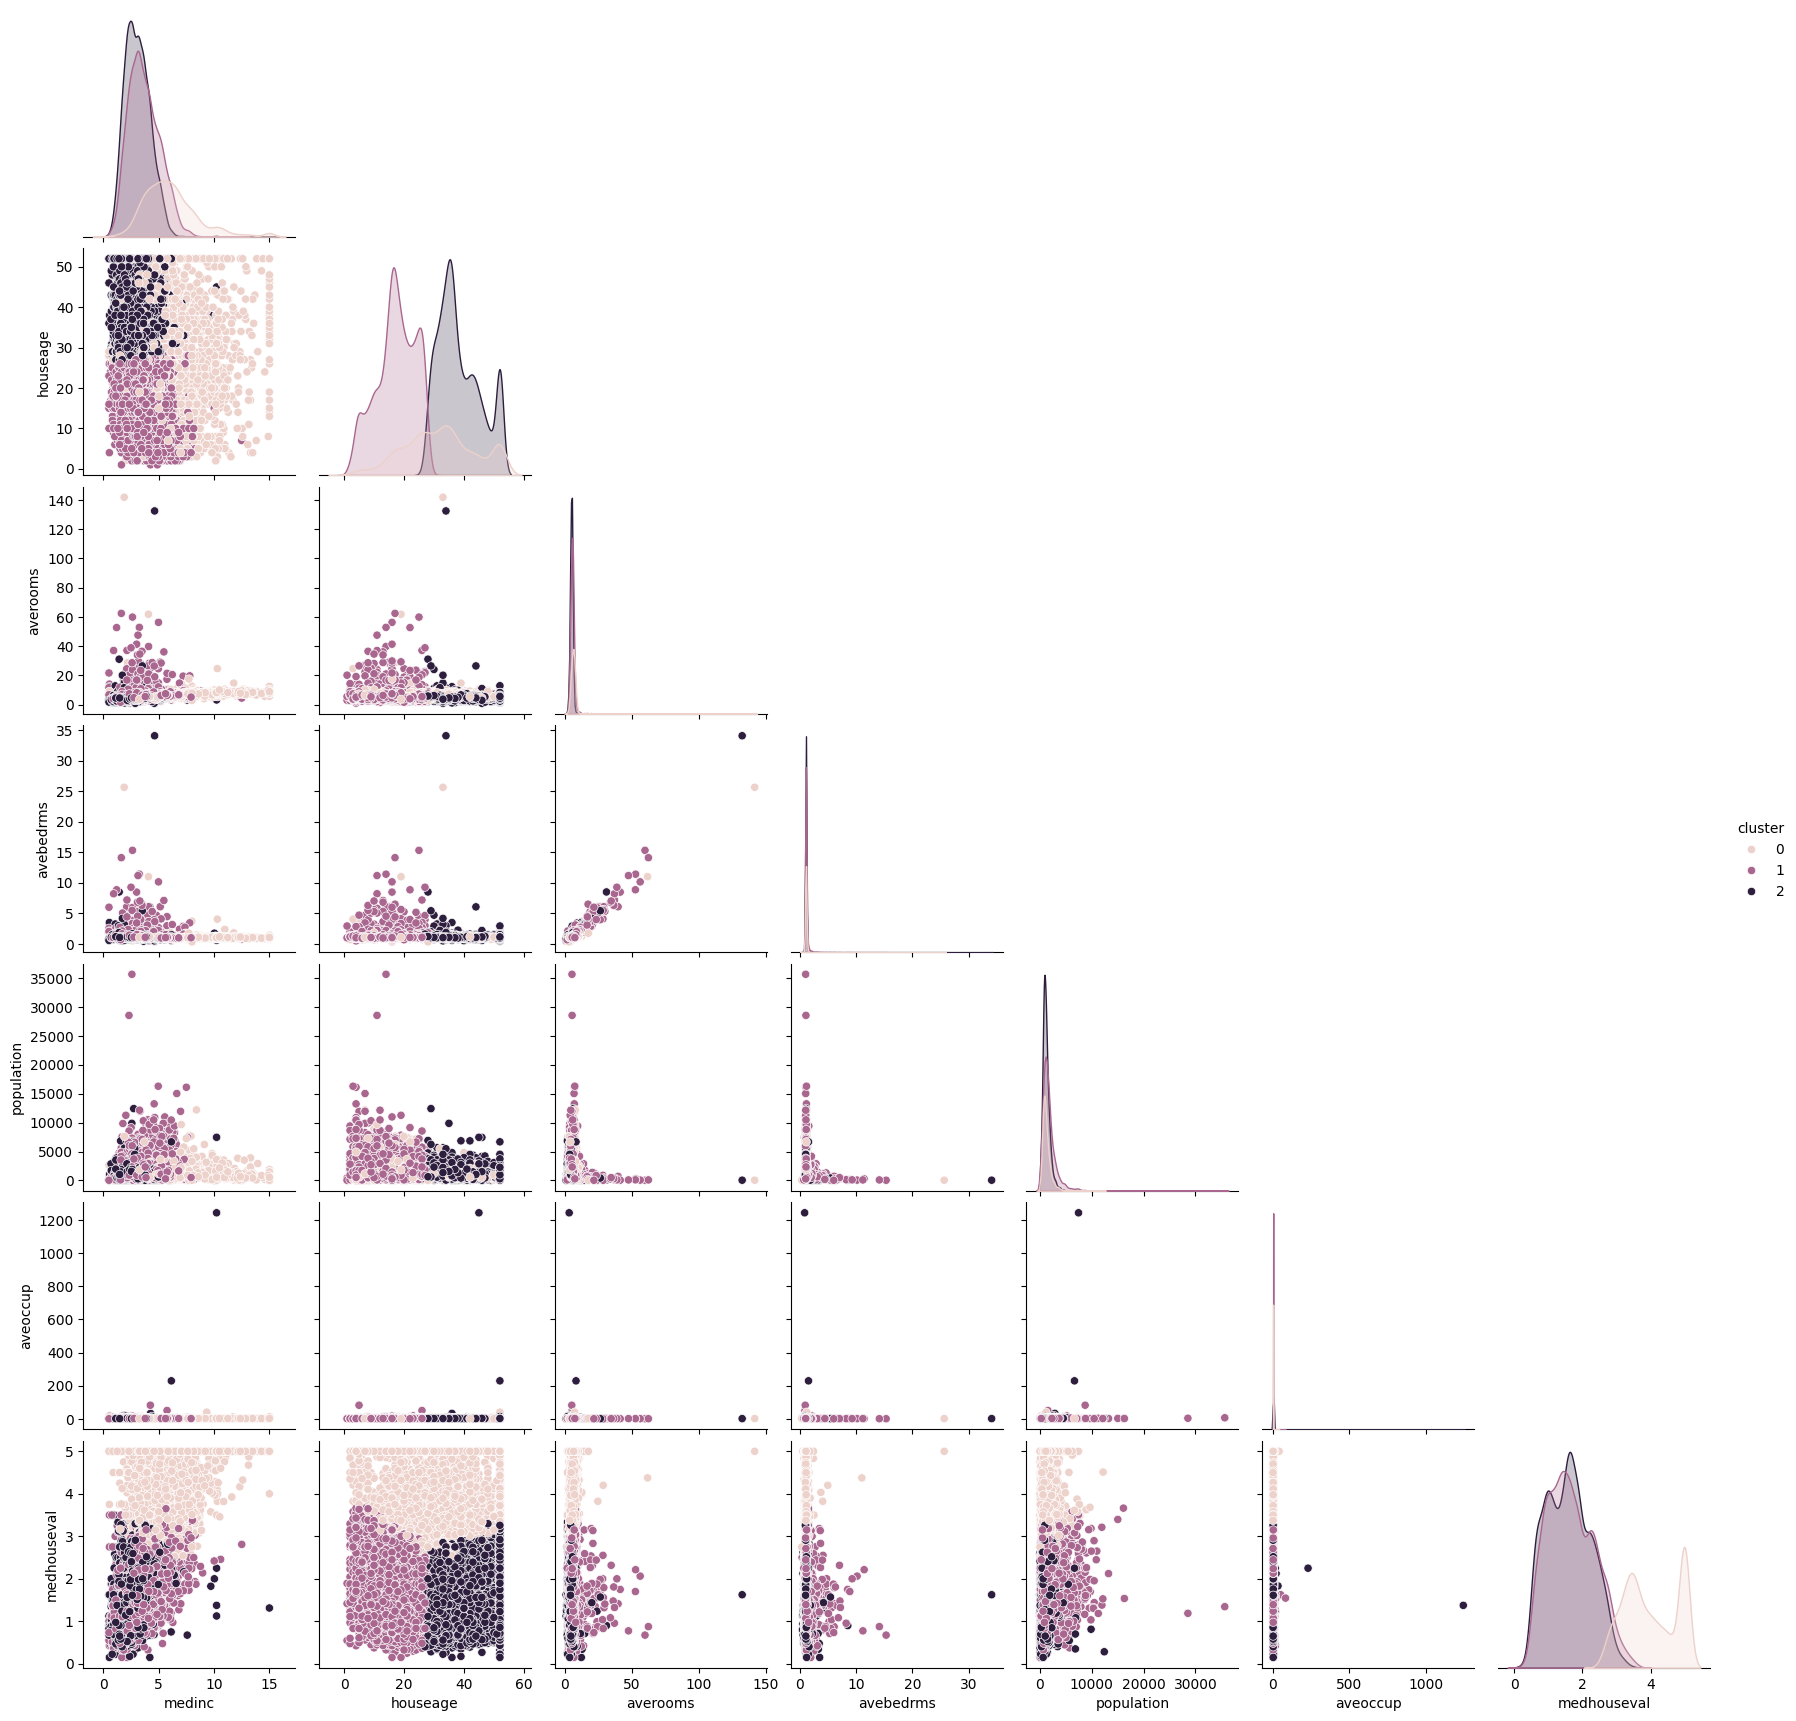

In [24]:
sns.pairplot(df_clustered, hue="cluster", corner=True)
plt.show()

hay graficas en las cuales se ven claramente los 3 grupos como en la combinacion de housage con medhouseval

In [28]:
predictions = clu_kmeans.predict(X_test_sc)
display(predictions)

array([0, 1, 2, ..., 1, 0, 2], shape=(4128,), dtype=int32)

In [29]:
df_clustered_test = df_test
df_clustered_test["cluster"]=predictions

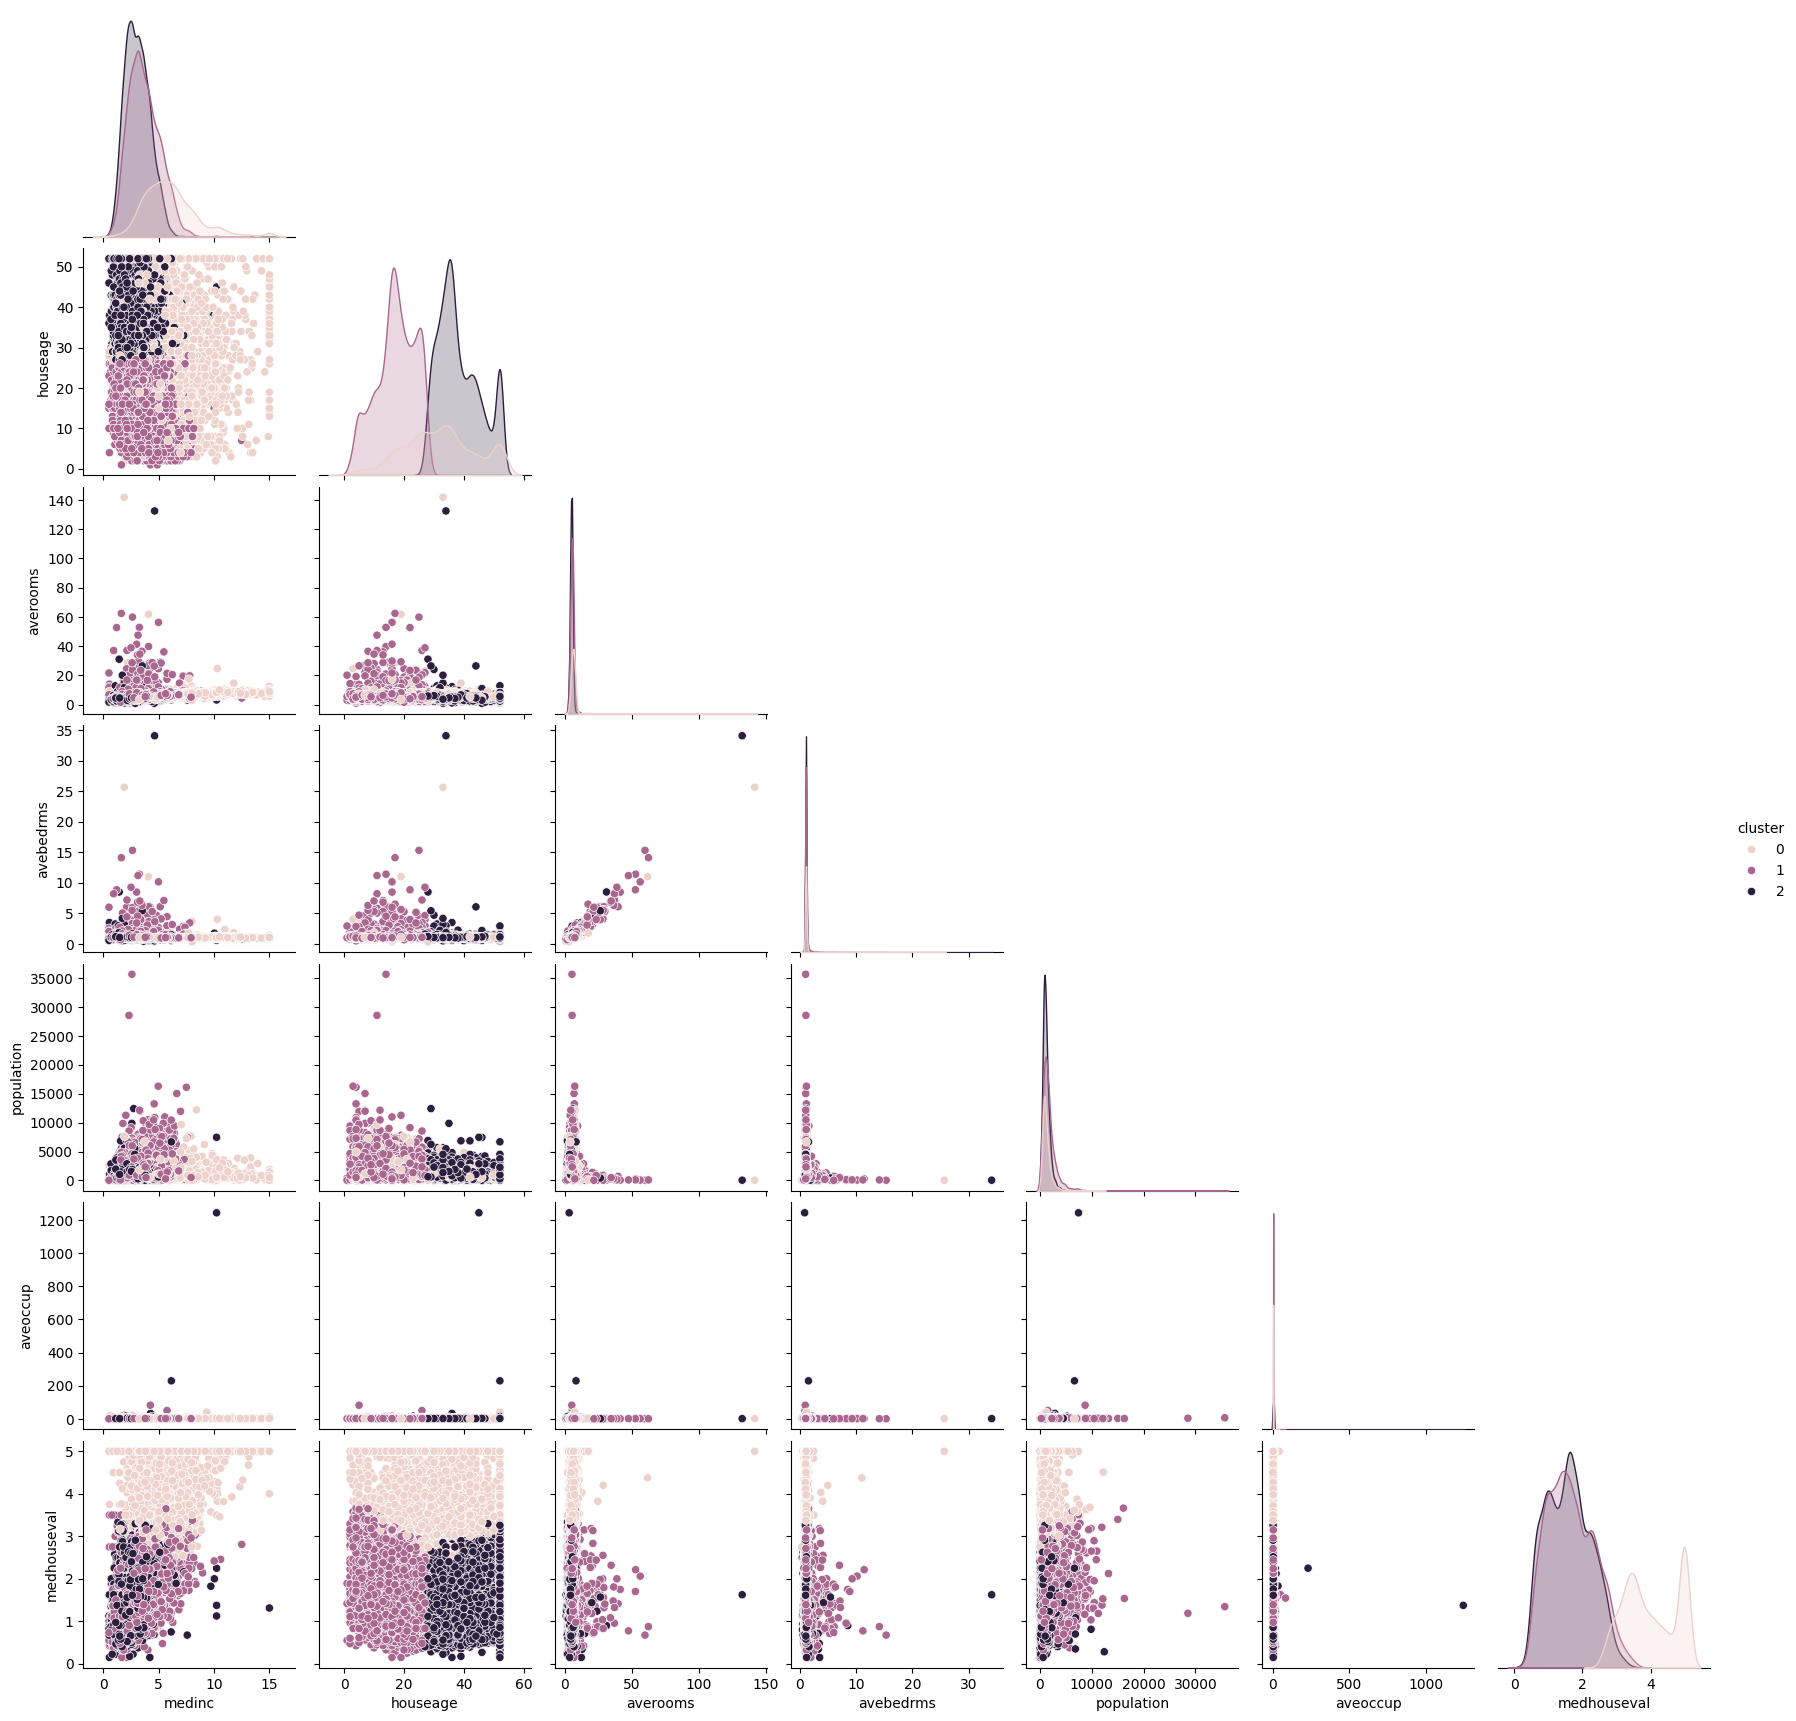

In [ ]:
sns.pairplot(df_clustered, hue="cluster", corner=True)
plt.show()

Los resultados son similares en test que en train